In [1]:
import sys
sys.path.add('../..')

import eeg_decoder 
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [3]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [5]:
time_window = 25 
time_step = 25
trial_average = 15 
n_splits = 100
group_dict = OrderedDict([('Color',color),('Orientation',ori)])

wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [6]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):

            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [7]:
interp = eeg_decoder.Interpreter(clfr,subtitle='attended_feat')
interp.save_results()

Significant timepoints: [ 184  208  232  256  280  304  328  352  376  400  424  448  472  496
  520  544  568  592  616  640  664  688  712  736  760  784  832  856
  880  928  952  976 1024 1048 1072 1096 1120]
Saving output\figures\attended_featacc.pdf
Saving output\figures\attended_featacc.png


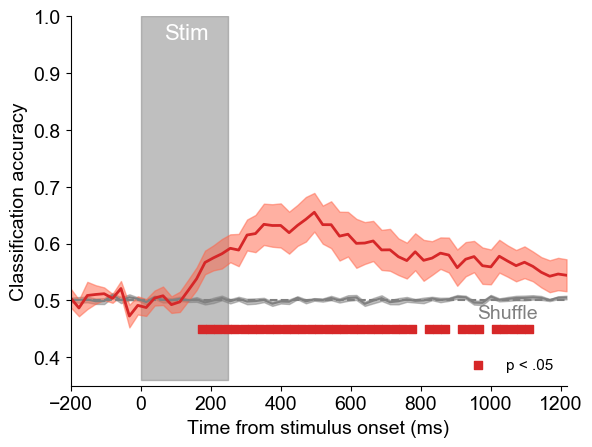

Mean delay accuracy: 0.590843339587242
Mean delay S.D.: 0.030134320765300864


In [9]:
interp.plot_acc(significance_testing=True,savefig=True,ylim=[.35,1],chance_text_y=.22)
plt.show()